In [1]:
import os
os.chdir('../')
os.getcwd()

'/work'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import mlflow

In [4]:
PATH_MUSHROOM_RESULT = "./mlruns/1/10851dbe8532423bbfe977a6b9c4683a/artifacts/result_all.csv"
PATH_MUSHROOM_TIME = "./mlruns/1/10851dbe8532423bbfe977a6b9c4683a/artifacts/fit_time.csv"
PATH_BANKNOTE_RESULT = "./mlruns/6/8ea7082e22b74103a807241db6e01098/artifacts/result_all.csv"
PATH_BANKNOTE_TIME = "./mlruns/6/8ea7082e22b74103a807241db6e01098/artifacts/fit_time.csv"
PATH_DEFAULT_RESULT = "./mlruns/7/06ee96a971624e0aa411f8bf89b45f14/artifacts/result_all.csv"
PATH_DEFAULT_TIME = "./mlruns/7/06ee96a971624e0aa411f8bf89b45f14/artifacts/fit_time.csv"
PATH_CONCRETE_RESULT = "./mlruns/2/f90cff5e668243deb72486753f44d988/artifacts/result_all.csv"
PATH_CONCRETE_TIME = "./mlruns/2/f90cff5e668243deb72486753f44d988/artifacts/fit_time.csv"
PATH_QSAR_RESULT = "./mlruns/12/8fdafe8dbe884974b79884b228be1c46/artifacts/result_all.csv"
PATH_QSAR_TIME = "./mlruns/12/8fdafe8dbe884974b79884b228be1c46/artifacts/fit_time.csv"
PATH_BIKE_RESULT = "./mlruns/9/f7c02e70e0fc49f285ea85de57f68bb8/artifacts/result_all.csv"
PATH_BIKE_TIME = "./mlruns/9/f7c02e70e0fc49f285ea85de57f68bb8/artifacts/fit_time.csv"
PATH_TRAFFIC_RESULT = "./mlruns/10/f61484dc010d4fca950d7f551dafa83d/artifacts/result_all.csv"
PATH_TRAFFIC_TIME = "./mlruns/10/f61484dc010d4fca950d7f551dafa83d/artifacts/fit_time.csv"

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
CHANGE_NAMES = {"two-stage TrAdaBoost" : "two-stage", "Trbagg" : "TrBagg"}

PALETTE ={
    "target GBDT":"C0", 
    "all GBDT":"C1",
    "TrAdaBoost":"C2",
    "two-stage": "C2",
    "TrBagg": "C4",
    "only Dropout": "C5",
    "target DART": "C6",
    "TrDART": "C3"
}

DROP_METHODS = ["two-stage"]

In [6]:
def get_one_domain(run_id, domain_str, metric_str):
    metric = f"{metric_str}_{domain_str}"
    drop_rate = f"drop_rate_{domain_str}"
    
    client = mlflow.tracking.MlflowClient()
    log_metrics = [one.value for one in client.get_metric_history(run_id, metric)]
    log_rates = [one.value for one in client.get_metric_history(run_id, drop_rate)]
    
    df = pd.DataFrame([log_metrics, log_rates], index=[metric_str, "drop_rate"]).T
    df["domain"] = domain_str
    
    return df


def get_metrics(run_id, domains, metric_name):
    df_all = pd.DataFrame()
    for domain in domains:
        df = get_one_domain(run_id, domain, metric_name)
        df_all = pd.concat([df_all, df])
        
    return df_all.reset_index(drop=True)

# 各データセットごとに分析

## mushroom

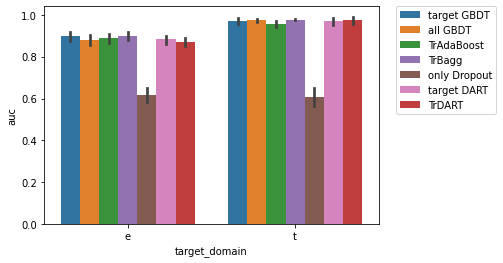

In [7]:
result_mushroom = pd.read_csv(PATH_MUSHROOM_RESULT).set_index('target_domain').stack().reset_index()
result_mushroom.rename(columns={"level_1":"method", 0:"auc"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    result_mushroom["method"].where(result_mushroom["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="auc", hue="method", data=result_mushroom, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


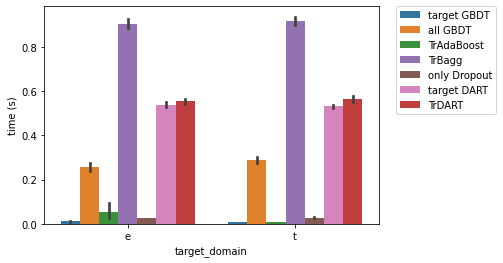

In [8]:
time_mushroom = pd.read_csv(PATH_MUSHROOM_TIME).set_index('target_domain').stack().reset_index()
time_mushroom.rename(columns={"level_1":"method", 0:"time (s)"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    time_mushroom["method"].where(time_mushroom["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_mushroom, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='drop_rate', ylabel='auc'>

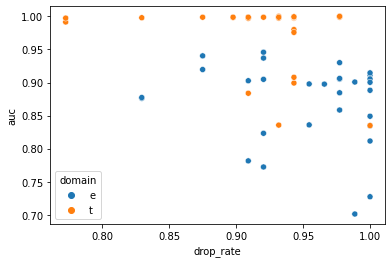

In [9]:
history_mushroom = get_metrics(PATH_MUSHROOM_RESULT.split('/')[3], ["e", "t"], "auc")
sns.scatterplot(x="drop_rate",y="auc",hue="domain", data=history_mushroom)

In [10]:
for domain in history_mushroom["domain"].unique():
    cor = history_mushroom.query('domain==@domain').corr().iloc[0,1]
    print(f"{domain} : {cor:.3f}")

e : -0.163
t : -0.239


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## banknote

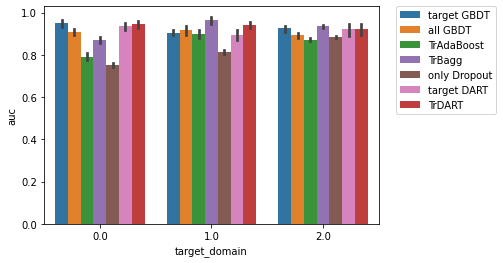

In [11]:
result_banknote = pd.read_csv(PATH_BANKNOTE_RESULT).set_index('target_domain').stack().reset_index()
result_banknote.rename(columns={"level_1":"method", 0:"auc"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    result_banknote["method"].where(result_banknote["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="auc", hue="method", data=result_banknote, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


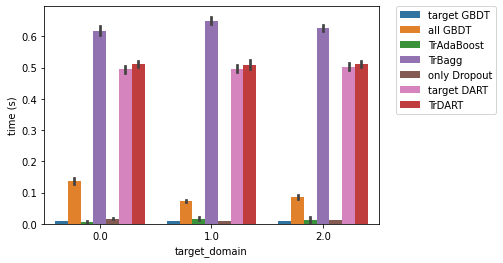

In [12]:
time_banknote = pd.read_csv(PATH_BANKNOTE_TIME).set_index('target_domain').stack().reset_index()
time_banknote.rename(columns={"level_1":"method", 0:"time (s)"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    time_banknote["method"].where(time_banknote["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_banknote, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='drop_rate', ylabel='auc'>

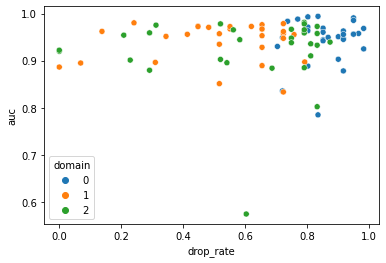

In [13]:
history_banknote = get_metrics(PATH_BANKNOTE_RESULT.split('/')[3], ["0", "1", "2"], "auc")
sns.scatterplot(x="drop_rate",y="auc",hue="domain", data=history_banknote)

In [14]:
for domain in history_banknote["domain"].unique():
    cor = history_banknote.query('domain==@domain').corr().iloc[0,1]
    print(f"{domain} : {cor:.3f}")

0 : 0.153
1 : 0.123
2 : 0.043


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# default

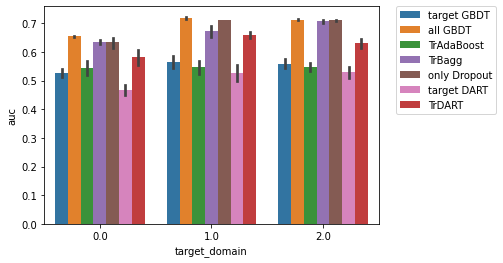

In [15]:
result_default = pd.read_csv(PATH_DEFAULT_RESULT).set_index('target_domain').stack().reset_index()
result_default.rename(columns={"level_1":"method", 0:"auc"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    result_default["method"].where(result_default["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="auc", hue="method", data=result_default, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


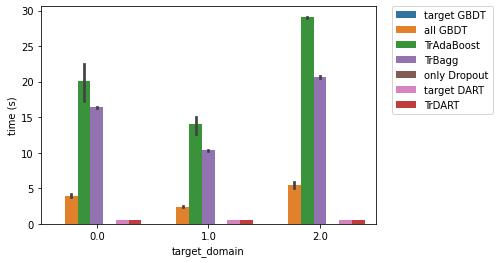

In [16]:
time_default = pd.read_csv(PATH_DEFAULT_TIME).set_index('target_domain').stack().reset_index()
time_default.rename(columns={"level_1":"method", 0:"time (s)"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    time_default["method"].where(time_default["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_default, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='drop_rate', ylabel='auc'>

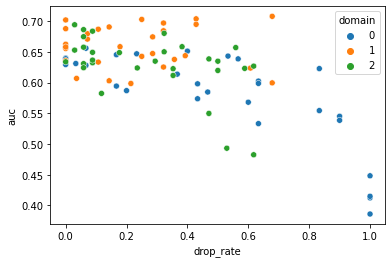

In [17]:
history_default = get_metrics(PATH_DEFAULT_RESULT.split('/')[3], ["0", "1", "2"], "auc")
sns.scatterplot(x="drop_rate",y="auc",hue="domain", data=history_default)

In [18]:
for domain in history_default["domain"].unique():
    cor = history_default.query('domain==@domain').corr().iloc[0,1]
    print(f"{domain} : {cor:.3f}")

0 : -0.781
1 : -0.024
2 : -0.505


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## concrete

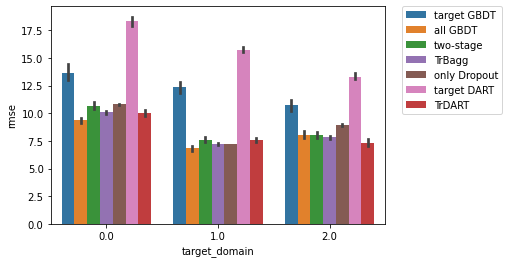

In [19]:
result_concrete = pd.read_csv(PATH_CONCRETE_RESULT).set_index('target_domain').stack().reset_index()
result_concrete.rename(columns={"level_1":"method", 0:"rmse"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    result_concrete["method"].where(result_concrete["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="rmse", hue="method", data=result_concrete, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


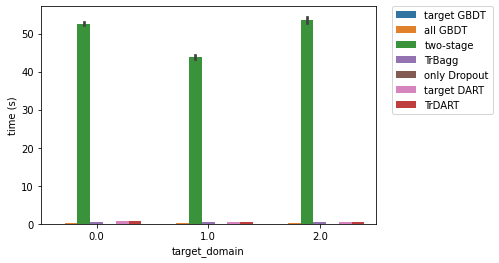

In [20]:
time_concrete = pd.read_csv(PATH_CONCRETE_TIME).set_index('target_domain').stack().reset_index()
time_concrete.rename(columns={"level_1":"method", 0:"time (s)"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    time_concrete["method"].where(time_concrete["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_concrete, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


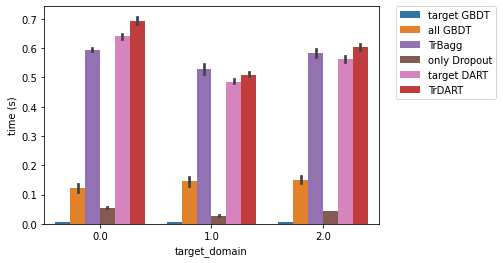

In [21]:
time_concrete_ = time_concrete.query('method not in @DROP_METHODS')
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_concrete_, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='drop_rate', ylabel='RMSE'>

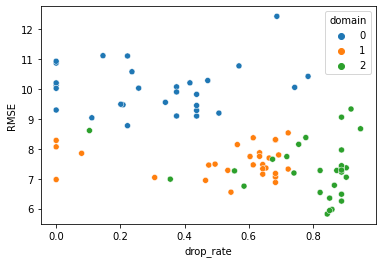

In [22]:
history_concrete = get_metrics(PATH_CONCRETE_RESULT.split('/')[3], ["0", "1", "2"], "RMSE")
sns.scatterplot(x="drop_rate",y="RMSE",hue="domain", data=history_concrete)

In [23]:
for domain in history_concrete["domain"].unique():
    cor = history_concrete.query('domain==@domain').corr().iloc[0,1]
    print(f"{domain} : {cor:.3f}")

0 : 0.087
1 : -0.052
2 : -0.128


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## qsar

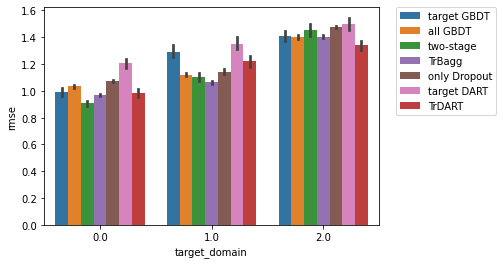

In [24]:
result_qsar = pd.read_csv(PATH_QSAR_RESULT).set_index('target_domain').stack().reset_index()
result_qsar.rename(columns={"level_1":"method", 0:"rmse"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    result_qsar["method"].where(result_qsar["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="rmse", hue="method", data=result_qsar, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


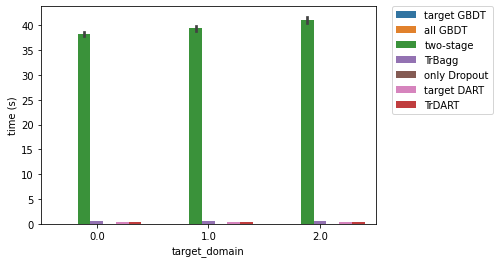

In [25]:
time_qsar = pd.read_csv(PATH_QSAR_TIME).set_index('target_domain').stack().reset_index()
time_qsar.rename(columns={"level_1":"method", 0:"time (s)"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    time_qsar["method"].where(time_qsar["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_qsar, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


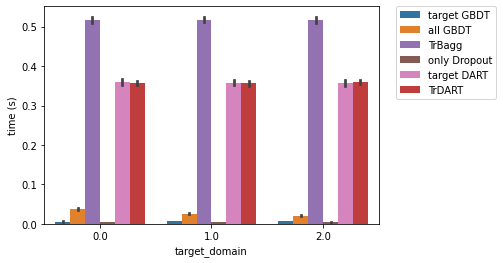

In [26]:
time_qsar_ = time_qsar.query('method not in @DROP_METHODS')
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_qsar_, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='drop_rate', ylabel='RMSE'>

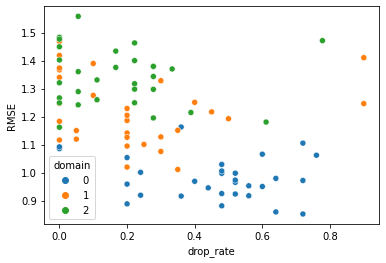

In [27]:
history_qsar = get_metrics(PATH_QSAR_RESULT.split('/')[3], ["0", "1", "2"], "RMSE")
sns.scatterplot(x="drop_rate",y="RMSE",hue="domain", data=history_qsar)

In [28]:
for domain in history_qsar["domain"].unique():
    cor = history_qsar.query('domain==@domain').corr().iloc[0,1]
    print(f"{domain} : {cor:.3f}")

0 : -0.220
1 : -0.070
2 : -0.081


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## bike

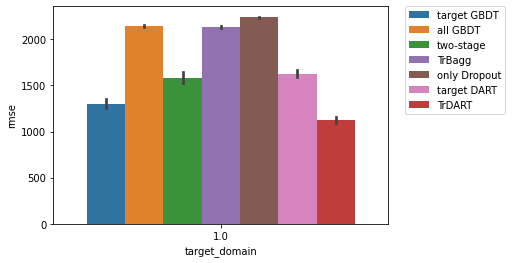

In [29]:
result_bike = pd.read_csv(PATH_BIKE_RESULT).set_index('target_domain').stack().reset_index()
result_bike.rename(columns={"level_1":"method", 0:"rmse"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    result_bike["method"].where(result_bike["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="rmse", hue="method", data=result_bike, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


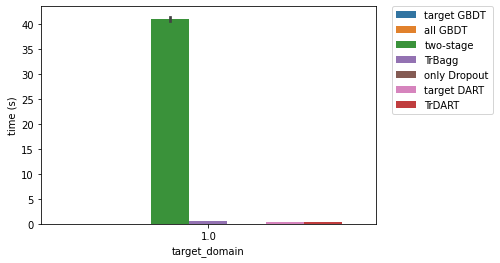

In [30]:
time_bike = pd.read_csv(PATH_BIKE_TIME).set_index('target_domain').stack().reset_index()
time_bike.rename(columns={"level_1":"method", 0:"time (s)"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    time_bike["method"].where(time_bike["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_bike, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


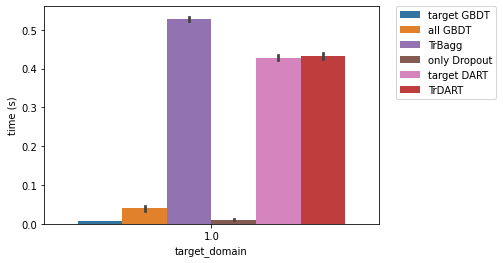

In [31]:
time_bike_ = time_bike.query('method not in @DROP_METHODS')
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_bike_, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='drop_rate', ylabel='RMSE'>

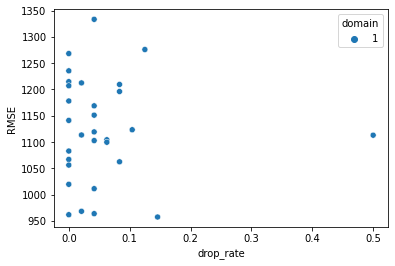

In [32]:
history_bike = get_metrics(PATH_BIKE_RESULT.split('/')[3], ["1"], "RMSE")
sns.scatterplot(x="drop_rate",y="RMSE",hue="domain", data=history_bike)

In [33]:
for domain in history_bike["domain"].unique():
    cor = history_bike.query('domain==@domain').corr().iloc[0,1]
    print(f"{domain} : {cor:.3f}")

1 : -0.029


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## traffic

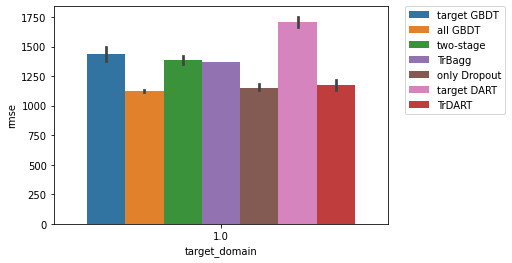

In [34]:
result_traffic = pd.read_csv(PATH_TRAFFIC_RESULT).set_index('target_domain').stack().reset_index()
result_traffic.rename(columns={"level_1":"method", 0:"rmse"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    result_traffic["method"].where(result_traffic["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="rmse", hue="method", data=result_traffic, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


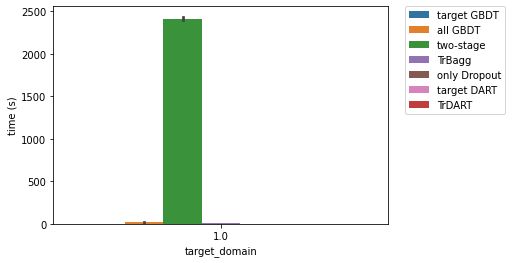

In [35]:
time_traffic = pd.read_csv(PATH_TRAFFIC_TIME).set_index('target_domain').stack().reset_index()
time_traffic.rename(columns={"level_1":"method", 0:"time (s)"}, inplace=True)
for key, val in CHANGE_NAMES.items():
    time_traffic["method"].where(time_traffic["method"]!=key, val, inplace=True)
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_traffic, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


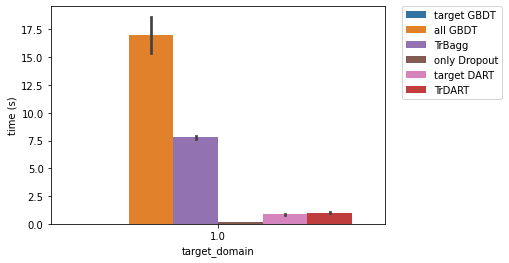

In [36]:
time_traffic_ = time_traffic.query('method not in @DROP_METHODS')
sns.barplot(x="target_domain", y="time (s)", hue="method", data=time_traffic_, palette=PALETTE)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='drop_rate', ylabel='RMSE'>

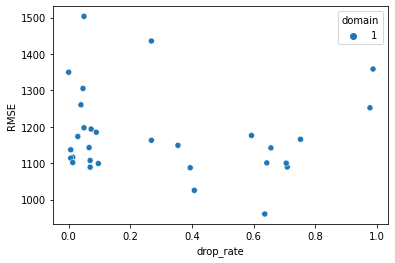

In [37]:
history_traffic = get_metrics(PATH_TRAFFIC_RESULT.split('/')[3], ["1"], "RMSE")
sns.scatterplot(x="drop_rate",y="RMSE",hue="domain", data=history_traffic)

In [38]:
for domain in history_traffic["domain"].unique():
    cor = history_traffic.query('domain==@domain').corr().iloc[0,1]
    print(f"{domain} : {cor:.3f}")

1 : -0.100


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 分類問題まとめ

In [39]:
method_index_binary = ["target GBDT", "all GBDT", "TrAdaBoost", "TrBagg", "only Dropout", "target DART", "TrDART"]
dataset_index_binary = ["mushroom", "banknote", "default"]

In [40]:
binary_dict = {"mushroom":result_mushroom, "banknote":result_banknote, "default":result_default}

df_long = pd.DataFrame()
for name, df in binary_dict.items():
    df["dataset"] = name
    df_long = pd.concat([df_long, df])
df_long.reset_index(drop=True, inplace=True)

df_binary = df_long.pivot_table(values="auc", index=["method"], 
                                columns=["dataset", "target_domain"], aggfunc="mean")

In [41]:
df_binary.loc[method_index_binary, pd.IndexSlice[dataset_index_binary, :]]

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dataset        mushroom            banknote                       default  \
target_domain         e         t       0.0       1.0       2.0       0.0   
method                                                                      
target GBDT    0.898282  0.970844  0.951887  0.904575  0.925492  0.525784   
all GBDT       0.879908  0.974046  0.906663  0.917130  0.893907  0.653836   
TrAdaBoost     0.888160  0.956590  0.792400  0.900293  0.872235  0.543117   
TrBagg         0.899209  0.977528  0.870587  0.965740  0.936369  0.634262   
only Dropout   0.618721  0.608049  0.750925  0.815725  0.885504  0.633796   
target DART    0.882914  0.970914  0.936017  0.895382  0.920484  0.466896   
TrDART         0.871373  0.975879  0.944427  0.942730  0.923014  0.582730   

dataset                            
target_domain       1.0       2.0  
method                             
target GBDT    0.564605  0.559080  
all GBDT       0.719310  0.712489  
TrAdaBoost     0.546810  0.547653  
TrBagg         0.674083  0.708047  
only Dropout   0.711896  0.709627  
target DART    0.526497  0.531002  
TrDART         0.659902  0.629783

# 回帰問題まとめ

In [42]:
method_index_regression = ["target GBDT", "all GBDT", "two-stage", "TrBagg", "only Dropout", "target DART", "TrDART"]
dataset_index_regression = ["concrete", "qsar", "bike", "traffic"]

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
regression_dict = {"concrete":result_concrete, "qsar":result_qsar, "bike":result_bike, "traffic":result_traffic}

df_long = pd.DataFrame()
for name, df in regression_dict.items():
    df["dataset"] = name
    df_long = pd.concat([df_long, df])
df_long.reset_index(drop=True, inplace=True)

df_regression = df_long.pivot_table(values="rmse", index=["method"], 
                                columns=["dataset", "target_domain"], aggfunc="mean")

In [44]:
df_regression.loc[method_index_regression, pd.IndexSlice[dataset_index_regression, :]]

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dataset         concrete                            qsar                      \
target_domain        0.0        1.0        2.0       0.0       1.0       2.0   
method                                                                         
target GBDT    13.620481  12.327057  10.708027  0.991402  1.290739  1.408876   
all GBDT        9.356929   6.843174   8.025810  1.032603  1.120318  1.401941   
two-stage      10.676606   7.595316   8.002229  0.907570  1.103793  1.452768   
TrBagg         10.063254   7.194424   7.808333  0.971150  1.061850  1.403013   
only Dropout   10.807145   7.211079   8.913695  1.074573  1.139050  1.474940   
target DART    18.302093  15.743641  13.313289  1.203442  1.351916  1.499025   
TrDART         10.024315   7.557493   7.318423  0.980216  1.218722  1.340670   

dataset               bike      traffic  
target_domain          1.0          1.0  
method                                   
target GBDT    1301.718507  1439.205395  
all GBDT       2141.419251  1123.740097  
two-stage      1582.663101  1389.218799  
TrBagg         2134.335091  1368.907438  
only Dropout   2238.064295  1153.282669  
target DART    1624.883931  1710.216426  
TrDART         1123.901341  1176.302163